# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup complete.")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setup complete.


In [2]:
rain_data = pd.read_csv('rainfall.csv')
rain_data.sample(5)

,Unnamed: 0,Date,Rainfall(mm)
8265,8266,2003-5-26,0.0
12066,12067,2014-1-21,0.0
8681,8682,2004-7-16,0.0
11244,11245,2011-7-22,0.0
8100,8101,2003-11-12,0.0



### EDA

In [3]:
rain_data.describe()

,Unnamed: 0,Rainfall(mm)
count,14427.000000,14427.000000
mean,7214.000000,2.374523
std,4164.860502,83.715218
min,1.000000,-9999.000000
25%,3607.500000,0.000000
50%,7214.000000,0.000000
75%,10820.500000,0.000000
max,14427.000000,110.714447


In [4]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14427 entries, 0 to 14426
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14427 non-null  int64  
 1   Date          14427 non-null  object 
 2   Rainfall(mm)  14427 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 338.3+ KB


In [5]:
rain_data.isnull().sum()

Unnamed: 0      0
Date            0
Rainfall(mm)    0
dtype: int64

### Feature Engineering

In [6]:
df = rain_data.copy()

In [7]:
df['new_year'] = pd.DatetimeIndex(df['Date']).year
df['new_month'] = pd.DatetimeIndex(df['Date']).month
df['new_day'] = pd.DatetimeIndex(df['Date']).day

In [8]:
df.drop(['Unnamed: 0', 'Date'], axis=1, inplace=True)

In [9]:
df.head()

,Rainfall(mm),new_year,new_month,new_day
0,0.0,1981,1,1
1,0.0,1981,1,10
2,0.0,1981,1,11
3,0.0,1981,1,12
4,0.0,1981,1,13


In [40]:
### drop the -9999 value
df.drop(df.loc[df['Rainfall(mm)']==9999].index, inplace=True)
df.drop(df.loc[df['Rainfall(mm)']==-9999].index, inplace=True)

In [41]:
df.describe()

,Rainfall(mm),new_year,new_month,new_day
count,14426.000000,14426.000000,14426.000000,14426.000000
mean,3.067811,2000.254540,6.484680,15.726189
std,8.598135,11.404585,3.448548,8.799631
min,0.000000,1981.000000,1.000000,1.000000
25%,0.000000,1990.000000,3.000000,8.000000
50%,0.000000,2000.000000,6.000000,16.000000
75%,0.000000,2010.000000,9.000000,23.000000
max,110.714447,2020.000000,12.000000,31.000000


In [61]:
cumm_df = df.copy()

In [67]:
cumm_df['cumm_Rainfall'] = cumm_df['Rainfall(mm)'].cumsum(axis=0)
cumm_df.head()

,Rainfall(mm),new_year,new_month,new_day,cumm_Rainfall
0,0.0,1981,1,1,0.0
1,0.0,1981,1,10,0.0
2,0.0,1981,1,11,0.0
3,0.0,1981,1,12,0.0
4,0.0,1981,1,13,0.0


### Visualizations

In [69]:
# Correlation
cumm_df.corr()

,Rainfall(mm),new_year,new_month,new_day,cumm_Rainfall
Rainfall(mm),1.000000,0.034820,0.010988,0.015430,0.036793
new_year,0.034820,1.000000,-0.019015,-0.000203,0.998459
new_month,0.010988,-0.019015,1.000000,0.010347,-0.016750
new_day,0.015430,-0.000203,0.010347,1.000000,-0.000120
cumm_Rainfall,0.036793,0.998459,-0.016750,-0.000120,1.000000


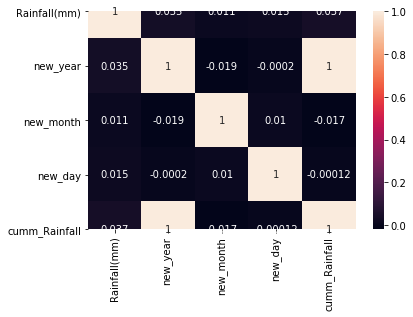

In [68]:
sns.heatmap(cumm_df.corr(), annot=True)

<function matplotlib.pyplot.show(*args, **kw)>

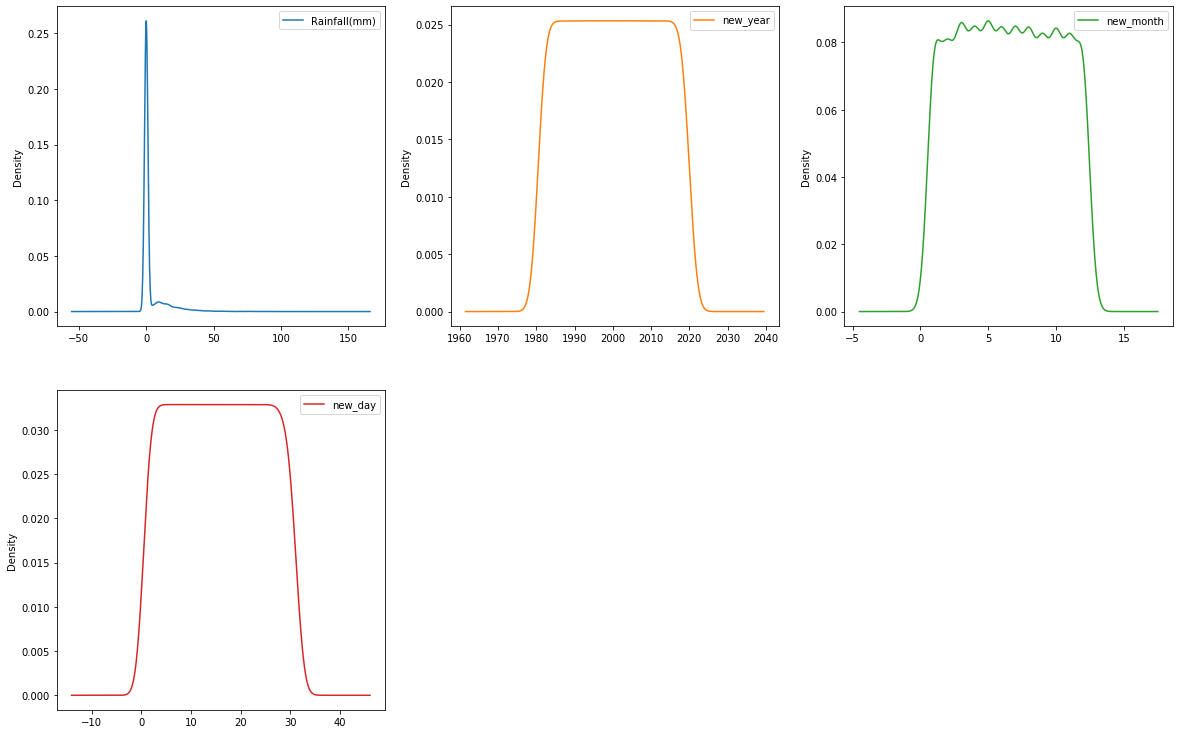

In [43]:
# density plot
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show

In [13]:
#df['Rainfall(mm)'].value_counts()
"""Out of 14427 Rainfall values, 11955 are zero == 83% of the data"""

'Out of 14427 Rainfall values, 11955 are zero == 83% of the data'

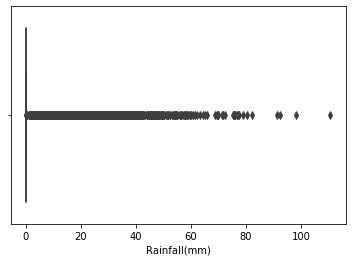

In [44]:
sns.boxplot(df['Rainfall(mm)'])

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1 = scaler.fit_transform(df)

In [48]:
data =  pd.DataFrame(df1)

In [49]:
data.head()

,0,1,2,3
0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.300000
2,0.0,0.0,0.0,0.333333
3,0.0,0.0,0.0,0.366667
4,0.0,0.0,0.0,0.400000


In [50]:
data.rename(columns={0:'Rainfall'}, inplace=True)
data.rename(columns={1:'year'}, inplace=True)
data.rename(columns={2:'month'}, inplace=True)
data.rename(columns={3:'day'}, inplace=True)

In [51]:
data.head()

,Rainfall,year,month,day
0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.300000
2,0.0,0.0,0.0,0.333333
3,0.0,0.0,0.0,0.366667
4,0.0,0.0,0.0,0.400000


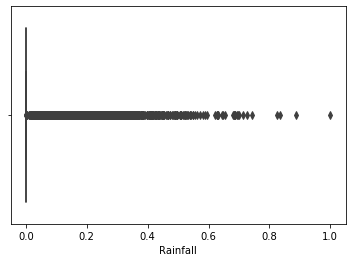

In [52]:
sns.boxplot(data['Rainfall'])

In [21]:
# Number of the Outliers
print(np.where(df['Rainfall(mm)']>0.10))

(array([   11,    34,    48, ..., 14420, 14421, 14423], dtype=int64),)


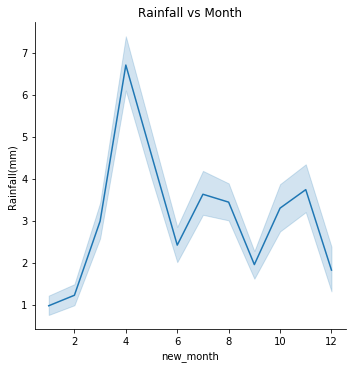

In [45]:
# Rainfall in relation to month
sns.relplot(y="Rainfall(mm)", x="new_month", kind="line", data=df).set(title="Rainfall vs Month")

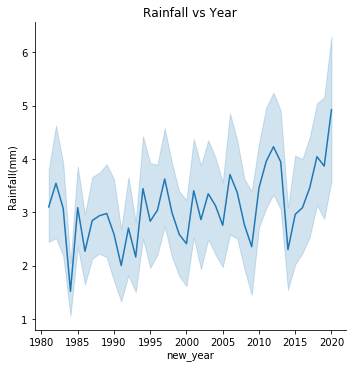

In [46]:
# Rainfall in relation to year
sns.relplot(y="Rainfall(mm)", x="new_year", kind="line", data=df).set(title="Rainfall vs Year")

### Modeling

In [53]:
from sklearn.model_selection import train_test_split

X = data.copy()
y = data.copy()

X_train, X_test, y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=32)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()

lr_model = lr.fit(X_train,y_train)
tree_model = tree.fit(X_train,y_train)
rf_model = rf.fit(X_train, y_train)

In [55]:
# predictions
lr_pred = lr_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print("========== Linear Regression =========")
print("MAE: ",mean_absolute_error(y_test, lr_pred))
print("R2 Score: ", r2_score(y_test, lr_pred))
print("RMSE: ", mean_squared_error(y_test, lr_pred))
print('Adj_r2: ', 1 - (1-r2_score(y_test, lr_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1))
#print("RMSE: ", mean_squared_error(test_data, lr_pred[:366]))
      
print("========== Decision Tree =========")
print("MAE: ",mean_absolute_error(y_test, tree_pred))
print("R2 Score: ", r2_score(y_test, tree_pred))
print("RMSE: ", mean_squared_error(y_test, tree_pred))
print('Adj_r2: ', 1 - (1-r2_score(y_test, tree_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1))

print("========== Random Forest =========")
print("MAE: ",mean_absolute_error(y_test, rf_pred))
print("R2 Score: ", r2_score(y_test, rf_pred))
print("RMSE: ", mean_squared_error(y_test, rf_pred))
print('Adj_r2: ', 1 - (1-r2_score(y_test, rf_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1))

========== Linear Regression =========
MAE:  1.0911582526620821e-16
R2 Score:  1.0
RMSE:  2.485105057113678e-32
Adj_r2:  1.0
========== Decision Tree =========
MAE:  0.012928354845768243
R2 Score:  0.9350874979303877
RMSE:  0.0008928774696054737
Adj_r2:  0.9350694929370947
========== Random Forest =========
MAE:  0.009634527443378015
R2 Score:  0.9485524719577667
RMSE:  0.00048328746139405507
Adj_r2:  0.9485382017884186


Text(0, 0.5, 'Predicted Value')

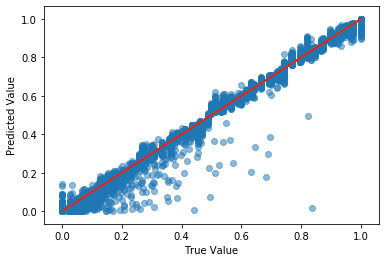

In [57]:
# Plot predicted vs actual - Random Forest
plt.scatter(y_test,rf_pred, alpha=0.5)
plt.plot(y_train, y_train) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
